<div style="text-align: center;">
  <h1>Cybersecurity Data Analysis</h1>
</div>

## Contexte
La cybersécurité est devenue un enjeu majeur dans un monde de plus en plus connecté.<br> 
Les incidents de cybersécurité peuvent avoir des impacts graves sur les entreprises, allant de la perte de données à des violations massives de confidentialité. 

## Source des Données
Ce dataset est disponible sur le dépôt GitHub : https://github.com/incribo-inc/cybersecurity_attacks.<br>  
Il recense divers incidents de cybersécurité en fournissant des informations détaillées sur le trafic réseau, les actions prises, et le contexte associé.<br> 
Les données concernent principalement des incidents observés en Inde, offrant ainsi un aperçu des vulnérabilités spécifiques à cette région.

## Description des Données
Le fichier contient 25 colonnes et un total de 40000 lignes. Ces données permettent de mieux comprendre les schémas des attaques, les segments vulnérables et les réponses associées.

### Variables Principales et Leur Signification
- **Timestamp** : Horodatage de l'événement, indiquant quand l'incident a eu lieu.
- **Source IP Address** et **Destination IP Address** : Adresses IP de la source et de la destination impliquées dans le trafic.
- **Source Port** et **Destination Port** : Ports réseau utilisés par la source et la destination.
- **Protocol** : Protocole de communication (ex : ICMP, UDP, TCP).
- **Packet Length** : Taille des paquets transmis, mesurée en octets.
- **Packet Type** : Type de paquet (données ou contrôle).
- **Traffic Type** : Type de trafic (HTTP, DNS, etc.).
- **Severity Level** : Niveau de gravité de l'incident (Low, Medium, High, etc.).
- **Geo-location Data** : Localisation géographique associée à l'incident.
- **Action Taken** : Action entreprise pour répondre à l'incident (ex : Bloqué, Ignoré, etc.).
- **User Information** et **Device Information** : Informations sur l'utilisateur et le périphérique impliqués.
- **Network Segment** : Segment réseau où l'incident a été enregistré.
- **IDS/IPS Alerts** : Alertes issues de systèmes de détection et de prévention des intrusions.

Détails des questions et axes d'analyse :

- Quelles sont les caractéristiques techniques et géographiques des attaques (types de trafic, protocoles, segments réseau vulnérables) et leurs corrélations avec la gravité ?
- Quels comportements et tendances temporelles révèlent ces attaques (exploitation de privilèges, requêtes réseau, périodicité), et comment influencent-ils leur succès ou gravité ?
- Quelles mesures de sécurité ont été mises en œuvre et quelle est leur efficacité face aux attaques identifiées ?

<b>En synthétisant ces informations, l'analyse visera à identifier des schémas récurrents, explorer des distributions statistiques, et fournir des insights pour améliorer les stratégies de détection et de réponse.<br> 
Cette exploration aidera également à mettre en évidence les segments les plus vulnérables et à formuler des recommandations spécifiques pour renforcer la cybersécurité globale.
</b>

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import re


## Data Loading

In [2]:
path="../data/raw/cybersecurity_attacks.csv"
data= pd.read_csv(path)
data.head

<bound method NDFrame.head of                  Timestamp Source IP Address Destination IP Address  \
0      2023-05-30 06:33:58     103.216.15.12           84.9.164.252   
1      2020-08-26 07:08:30    78.199.217.198         66.191.137.154   
2      2022-11-13 08:23:25      63.79.210.48          198.219.82.17   
3      2023-07-02 10:38:46     163.42.196.10        101.228.192.255   
4      2023-07-16 13:11:07     71.166.185.76        189.243.174.238   
...                    ...               ...                    ...   
39995  2023-05-26 14:08:42      26.36.109.26         121.100.75.240   
39996  2023-03-27 00:38:27      17.21.163.81         196.108.134.78   
39997  2022-03-31 01:45:49     162.35.217.57            98.107.0.15   
39998  2023-09-22 18:32:38    208.72.233.205         173.79.112.252   
39999  2023-10-10 11:59:52     14.102.21.108           109.198.45.7   

       Source Port  Destination Port Protocol  Packet Length Packet Type  \
0            31225             17616     

## Data Exploration

----------------------

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

### Description du jeu de données

Ce dataset comprend **25 variables** réparties en :

#### Variables catégorielles (17) :
- `Timestamp` (format objet)
- `Source IP Address`
- `Destination IP Address` 
- `Protocol`
- `Packet Type`
- `Traffic Type`
- `Payload Data`
- `Malware Indicators` (50% de valeurs manquantes)
- `Alerts/Warnings` (~50% manquants)
- `Attack Type`
- `Attack Signature`
- `Action Taken`
- `Severity Level` 
- `User Information`
- `Device Information`
- `Network Segment`
- `Geo-location Data`
- `Proxy Information` (~50% manquants)
- `Firewall Logs` (~50% manquants)
- `IDS/IPS Alerts` (~50% manquants)
- `Log Source`

#### Variables numériques (4) :
- `Source Port` (int64)
- `Destination Port` (int64) 
- `Packet Length` (int64)
- `Anomaly Scores` (float64)
---

In [5]:
print("Missing data :")
data.isnull().sum().sort_values(ascending=False)

Missing data :


Alerts/Warnings           20067
IDS/IPS Alerts            20050
Malware Indicators        20000
Firewall Logs             19961
Proxy Information         19851
Attack Type                   0
Geo-location Data             0
Network Segment               0
Device Information            0
User Information              0
Severity Level                0
Action Taken                  0
Attack Signature              0
Timestamp                     0
Source IP Address             0
Anomaly Scores                0
Payload Data                  0
Traffic Type                  0
Packet Type                   0
Packet Length                 0
Protocol                      0
Destination Port              0
Source Port                   0
Destination IP Address        0
Log Source                    0
dtype: int64

## Data Preparation

+ Suppression de la colonne "Payload Data" :<br>
 Ce champ ne semblait pas nécessaire pour l'analyse, donc on l'a éliminé pour alléger le jeu de données et éviter les confusions.<br>
+ Remplacement des valeurs manquantes :<br>
. "Alerts/Warnings" → "Alert Not Triggered" (précise qu'aucune alerte n'a été déclenchée).<br>
. "Firewall Logs" → "No Data" (indique l'absence d'enregistrements).<br>
. "Proxy Information" → "No Data" (standardise les données manquantes).<br>
. "IDS/IPS Alerts" → "No Data" (évite les valeurs vides).<br>
. "Malware Indicators" → "Unknown" (indique une absence ou une incertitude sur les indicateurs de malware).<br>

In [6]:
cleaned_data=data.drop("Payload Data",axis=1)
cleaned_data["Alerts/Warnings"] = cleaned_data["Alerts/Warnings"].fillna("Alert Not Triggered")
cleaned_data["Firewall Logs"] = cleaned_data["Firewall Logs"].fillna("No Data")
cleaned_data["Proxy Information"] = cleaned_data["Proxy Information"].fillna("No Data")
cleaned_data["IDS/IPS Alerts"] = cleaned_data["IDS/IPS Alerts"].fillna("No Data")
cleaned_data["Malware Indicators"] = cleaned_data["Malware Indicators"].fillna("Unknown")
cleaned_data.isnull().sum().sort_values(ascending=False)


Timestamp                 0
Source IP Address         0
IDS/IPS Alerts            0
Firewall Logs             0
Proxy Information         0
Geo-location Data         0
Network Segment           0
Device Information        0
User Information          0
Severity Level            0
Action Taken              0
Attack Signature          0
Attack Type               0
Alerts/Warnings           0
Anomaly Scores            0
Malware Indicators        0
Traffic Type              0
Packet Type               0
Packet Length             0
Protocol                  0
Destination Port          0
Source Port               0
Destination IP Address    0
Log Source                0
dtype: int64

In [7]:
cleaned_data['Browser'] = cleaned_data['Device Information'].str.split('/').str[0]


In [8]:

platform = r'(Windows|Linux|Android|iPad|iPod|iPhone|Macintosh)'
cleaned_data['Platform'] = cleaned_data['Device Information'].str.extract(platform, flags=re.I).fillna('Unknown')
cleaned_data = cleaned_data.drop('Device Information', axis = 1)

In [9]:
# Extract time features
cleaned_data["Timestamp"] = pd.to_datetime(cleaned_data["Timestamp"], errors='coerce')
cleaned_data['Year'] = cleaned_data["Timestamp"].dt.year
cleaned_data['Month'] = cleaned_data["Timestamp"].dt.month
cleaned_data['Day'] = cleaned_data["Timestamp"].dt.day
cleaned_data['Hour'] = cleaned_data["Timestamp"].dt.hour
cleaned_data['Minute'] = cleaned_data["Timestamp"].dt.minute
cleaned_data['Second'] = cleaned_data["Timestamp"].dt.second
cleaned_data['DayOfWeek'] = cleaned_data["Timestamp"].dt.dayofweek

In [11]:
new_path="../data/processed/processed_cybersecurity_attacks.csv"
cleaned_data.to_csv(new_path)

---

## Univariate Descriptive Analysis


--------------------------------------------------
Variable : Protocol
Nombre de valeurs non nulles : 40000
Nombre de modalités uniques : 3
Top 10 des modalités les plus fréquentes :
Protocol
ICMP    13429
UDP     13299
TCP     13272
Name: count, dtype: int64


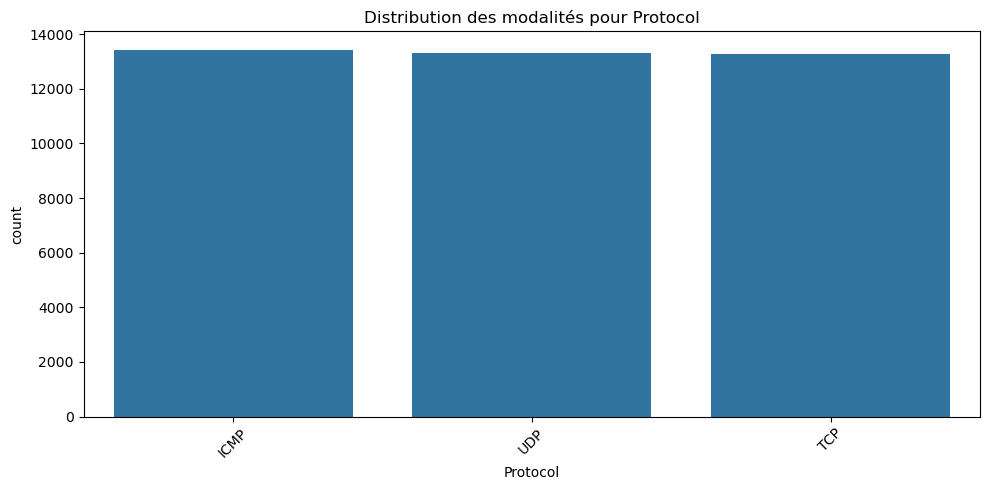


--------------------------------------------------
Variable : Packet Type
Nombre de valeurs non nulles : 40000
Nombre de modalités uniques : 2
Top 10 des modalités les plus fréquentes :
Packet Type
Control    20237
Data       19763
Name: count, dtype: int64


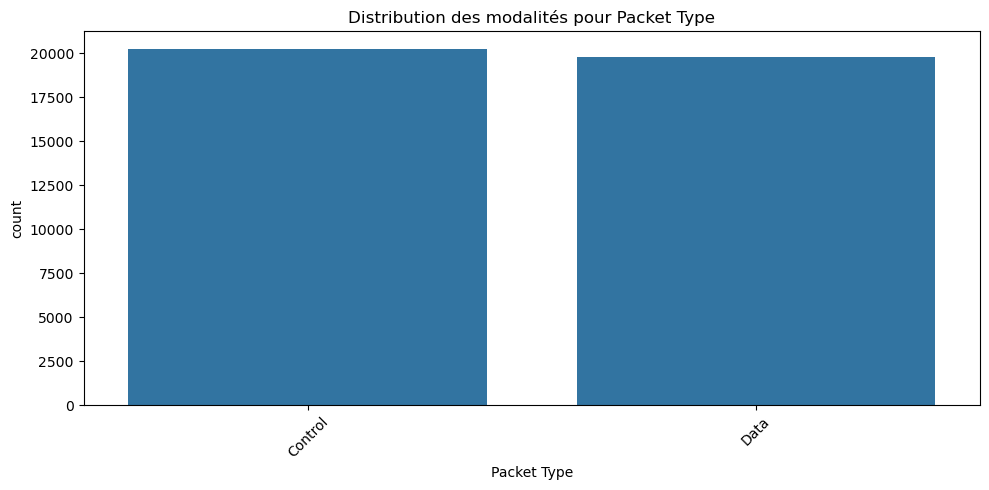


--------------------------------------------------
Variable : Traffic Type
Nombre de valeurs non nulles : 40000
Nombre de modalités uniques : 3
Top 10 des modalités les plus fréquentes :
Traffic Type
DNS     13376
HTTP    13360
FTP     13264
Name: count, dtype: int64


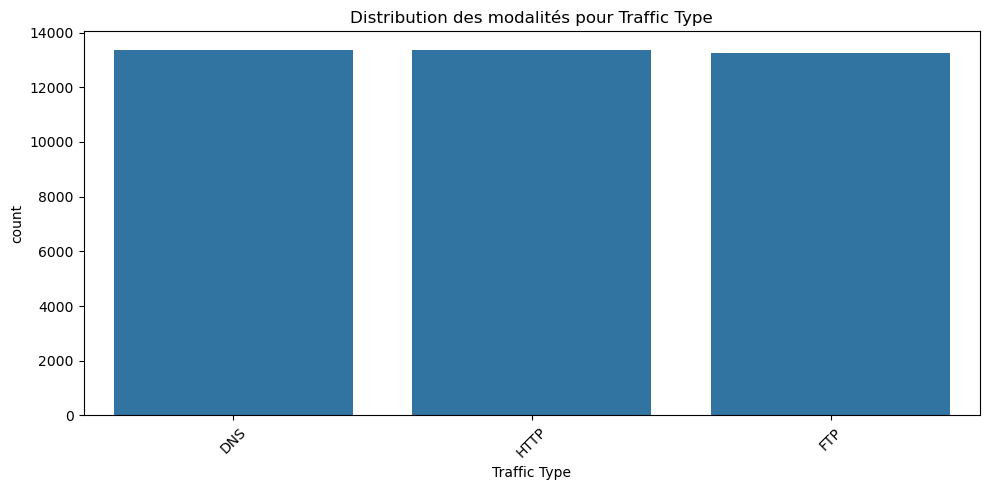


--------------------------------------------------
Variable : Malware Indicators
Nombre de valeurs non nulles : 40000
Nombre de modalités uniques : 2
Top 10 des modalités les plus fréquentes :
Malware Indicators
IoC Detected    20000
Unknown         20000
Name: count, dtype: int64


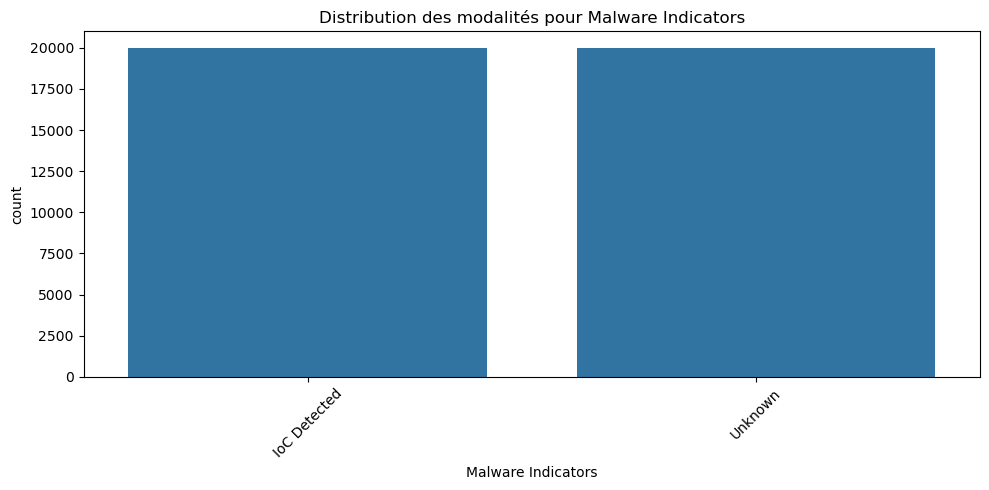


--------------------------------------------------
Variable : Platform
Nombre de valeurs non nulles : 40000
Nombre de modalités uniques : 7
Top 10 des modalités les plus fréquentes :
Platform
Windows      17953
Linux         8840
Macintosh     5813
iPod          2656
Android       1620
iPhone        1567
iPad          1551
Name: count, dtype: int64


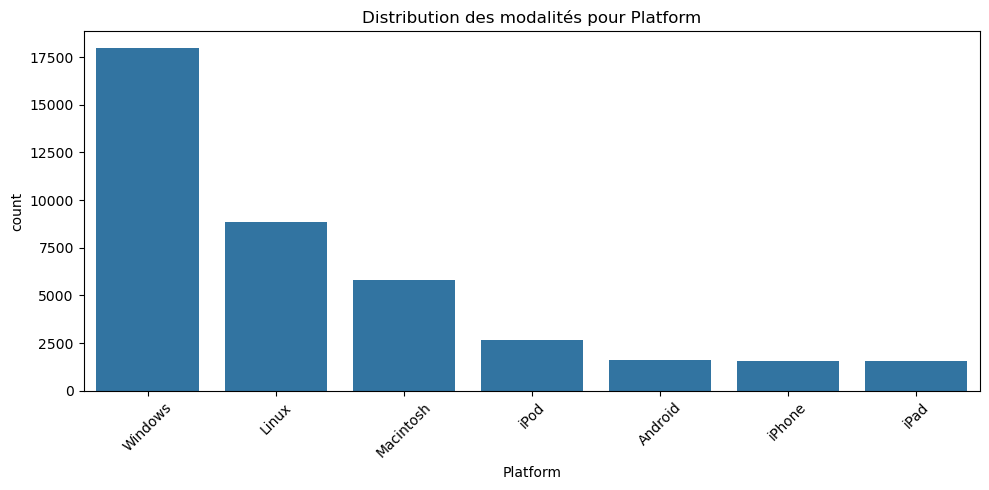


--------------------------------------------------
Variable : Browser
Nombre de valeurs non nulles : 40000
Nombre de modalités uniques : 2
Top 10 des modalités les plus fréquentes :
Browser
Mozilla    31951
Opera       8049
Name: count, dtype: int64


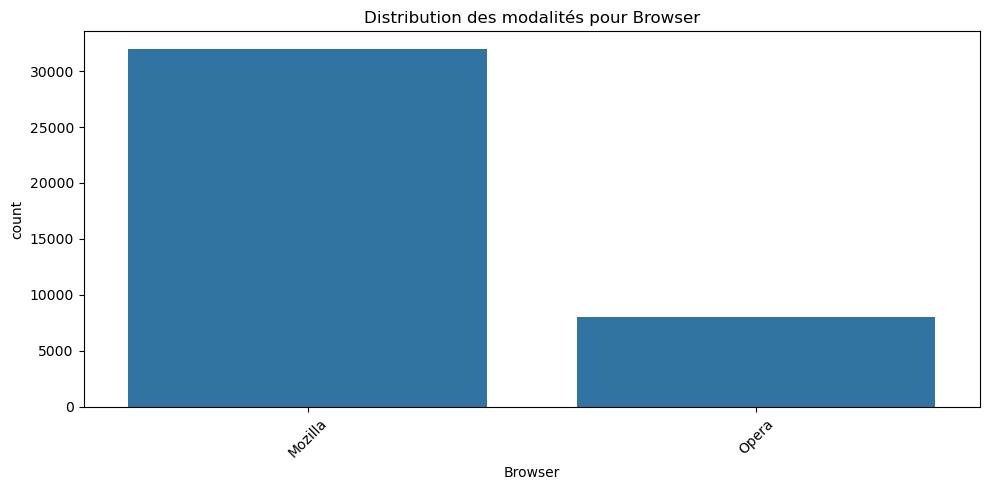


--------------------------------------------------
Variable : Alerts/Warnings
Nombre de valeurs non nulles : 40000
Nombre de modalités uniques : 2
Top 10 des modalités les plus fréquentes :
Alerts/Warnings
Alert Not Triggered    20067
Alert Triggered        19933
Name: count, dtype: int64


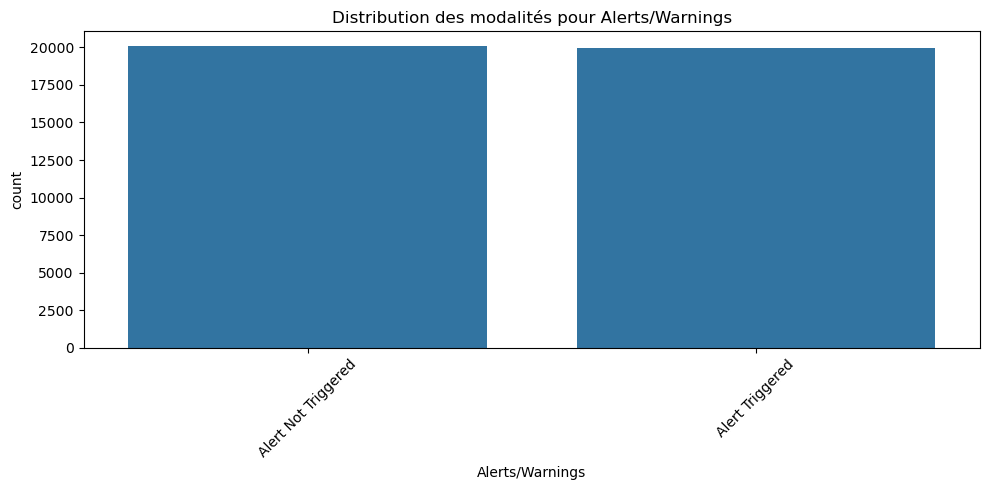


--------------------------------------------------
Variable : Attack Type
Nombre de valeurs non nulles : 40000
Nombre de modalités uniques : 3
Top 10 des modalités les plus fréquentes :
Attack Type
DDoS         13428
Malware      13307
Intrusion    13265
Name: count, dtype: int64


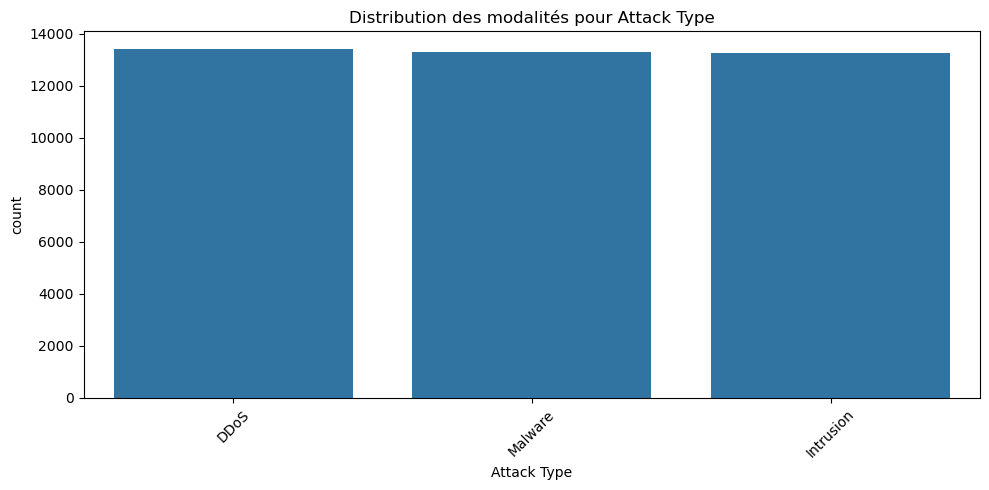


--------------------------------------------------
Variable : Attack Signature
Nombre de valeurs non nulles : 40000
Nombre de modalités uniques : 2
Top 10 des modalités les plus fréquentes :
Attack Signature
Known Pattern A    20076
Known Pattern B    19924
Name: count, dtype: int64


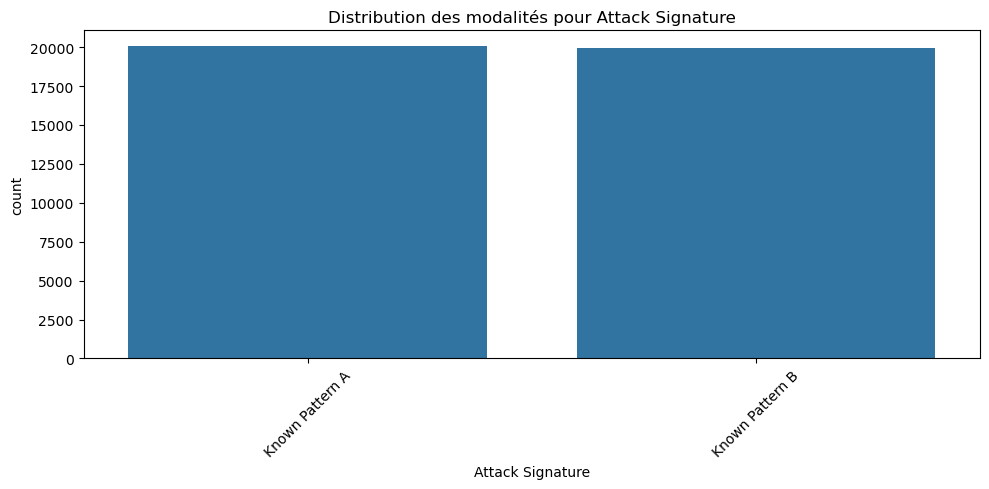


--------------------------------------------------
Variable : Action Taken
Nombre de valeurs non nulles : 40000
Nombre de modalités uniques : 3
Top 10 des modalités les plus fréquentes :
Action Taken
Blocked    13529
Ignored    13276
Logged     13195
Name: count, dtype: int64


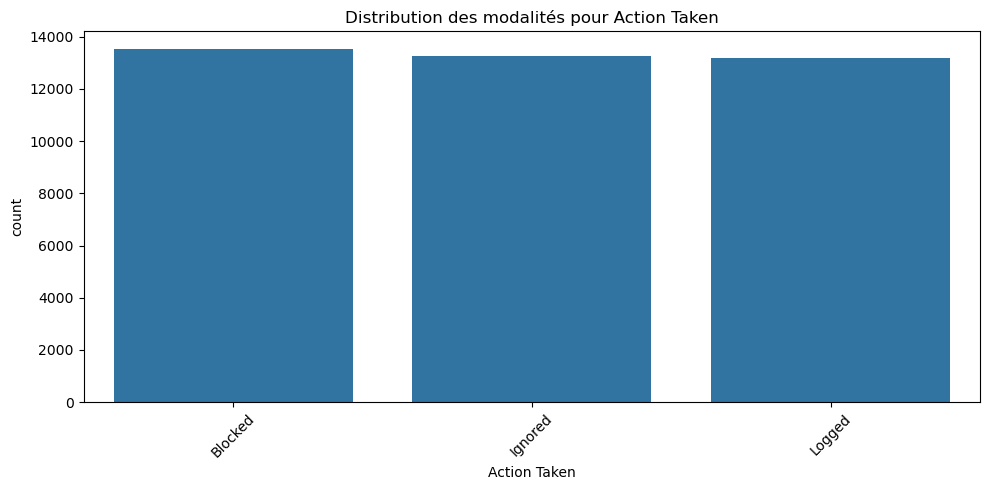


--------------------------------------------------
Variable : Severity Level
Nombre de valeurs non nulles : 40000
Nombre de modalités uniques : 3
Top 10 des modalités les plus fréquentes :
Severity Level
Medium    13435
High      13382
Low       13183
Name: count, dtype: int64


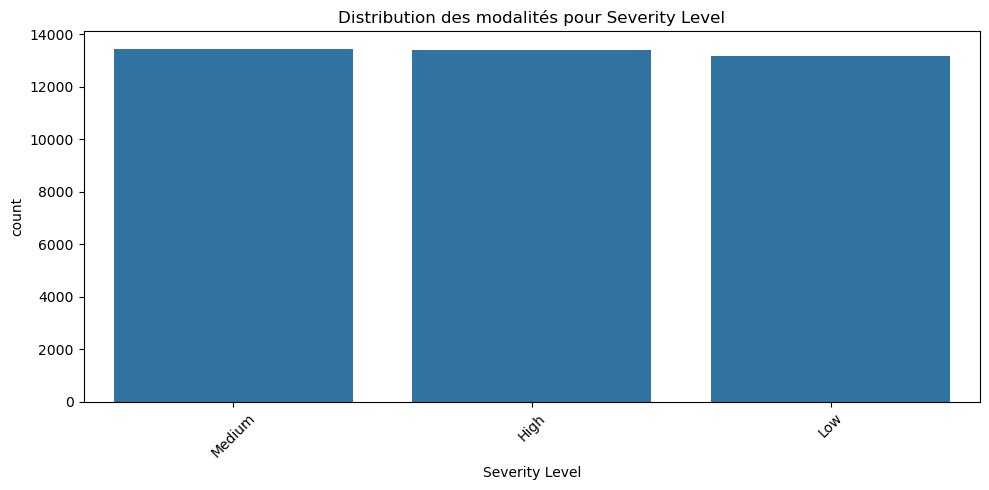


--------------------------------------------------
Variable : Network Segment
Nombre de valeurs non nulles : 40000
Nombre de modalités uniques : 3
Top 10 des modalités les plus fréquentes :
Network Segment
Segment C    13408
Segment B    13319
Segment A    13273
Name: count, dtype: int64


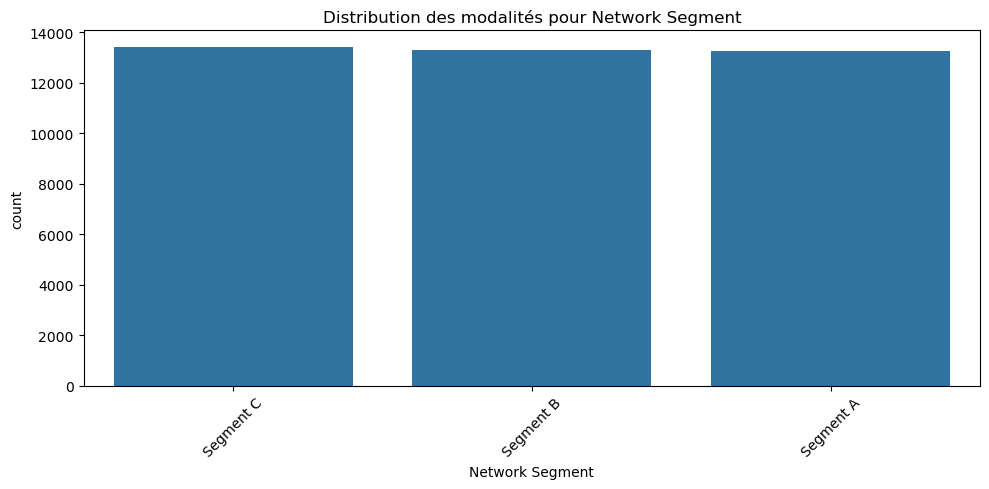


--------------------------------------------------
Variable : Firewall Logs
Nombre de valeurs non nulles : 40000
Nombre de modalités uniques : 2
Top 10 des modalités les plus fréquentes :
Firewall Logs
Log Data    20039
No Data     19961
Name: count, dtype: int64


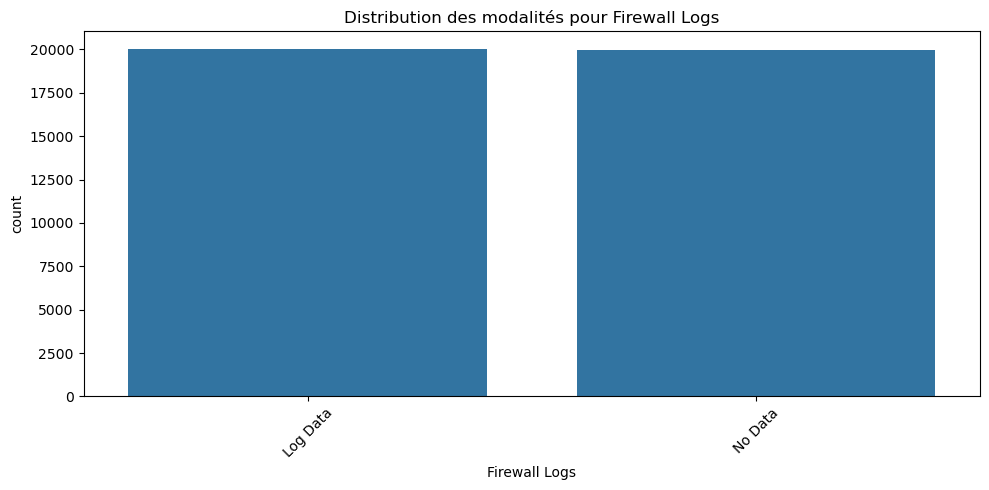


--------------------------------------------------
Variable : IDS/IPS Alerts
Nombre de valeurs non nulles : 40000
Nombre de modalités uniques : 2
Top 10 des modalités les plus fréquentes :
IDS/IPS Alerts
No Data       20050
Alert Data    19950
Name: count, dtype: int64


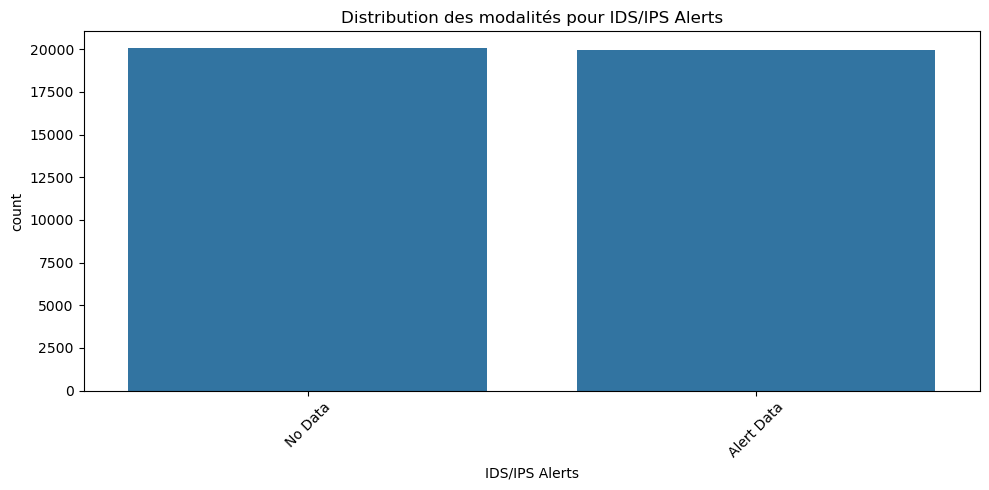


--------------------------------------------------
Variable : Log Source
Nombre de valeurs non nulles : 40000
Nombre de modalités uniques : 2
Top 10 des modalités les plus fréquentes :
Log Source
Firewall    20116
Server      19884
Name: count, dtype: int64


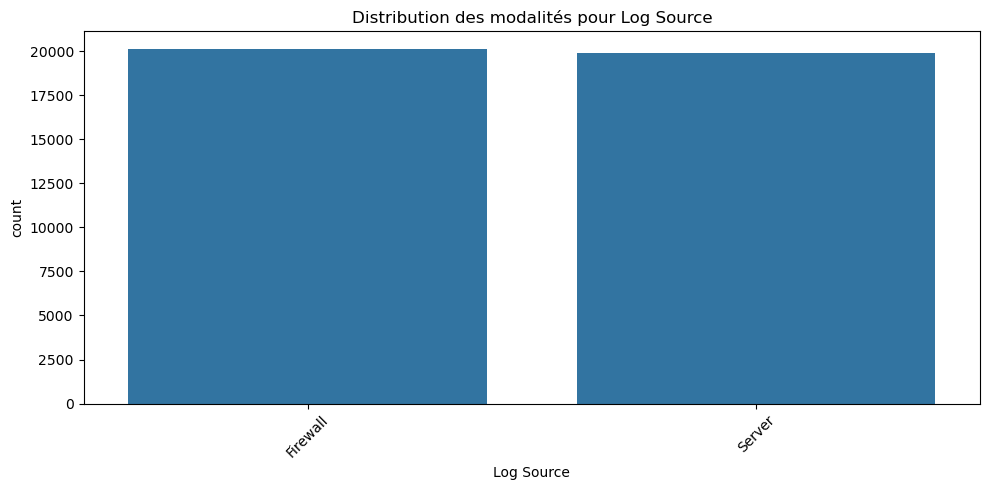

In [16]:


# Liste des variables catégorielles
variables_categorielles = [
      'Protocol',
    'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators','Platform','Browser',
    'Alerts/Warnings', 'Attack Type', 'Attack Signature', 'Action Taken',
    'Severity Level', 'Device Information',
    'Network Segment',  
    'Firewall Logs', 'IDS/IPS Alerts', 'Log Source'
]


for var in variables_categorielles:
    if var in cleaned_data.columns:
        print(f"\n{'-'*50}\nVariable : {var}")
        
        
        non_null_count = cleaned_data[var].notnull().sum()
        print(f"Nombre de valeurs non nulles : {non_null_count}")
        
       
        unique_values = cleaned_data[var].nunique(dropna=True)
        print(f"Nombre de modalités uniques : {unique_values}")
        
        
        top_modalities = cleaned_data[var].value_counts(dropna=True).head(10)
        print("Top 10 des modalités les plus fréquentes :")
        print(top_modalities)
        
        # Visualisation : diagramme en barres des modalités les plus fréquentes
        plt.figure(figsize=(10, 5))
        sns.countplot(data=cleaned_data, x=var, order=top_modalities.index)
        plt.title(f"Distribution des modalités pour {var}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


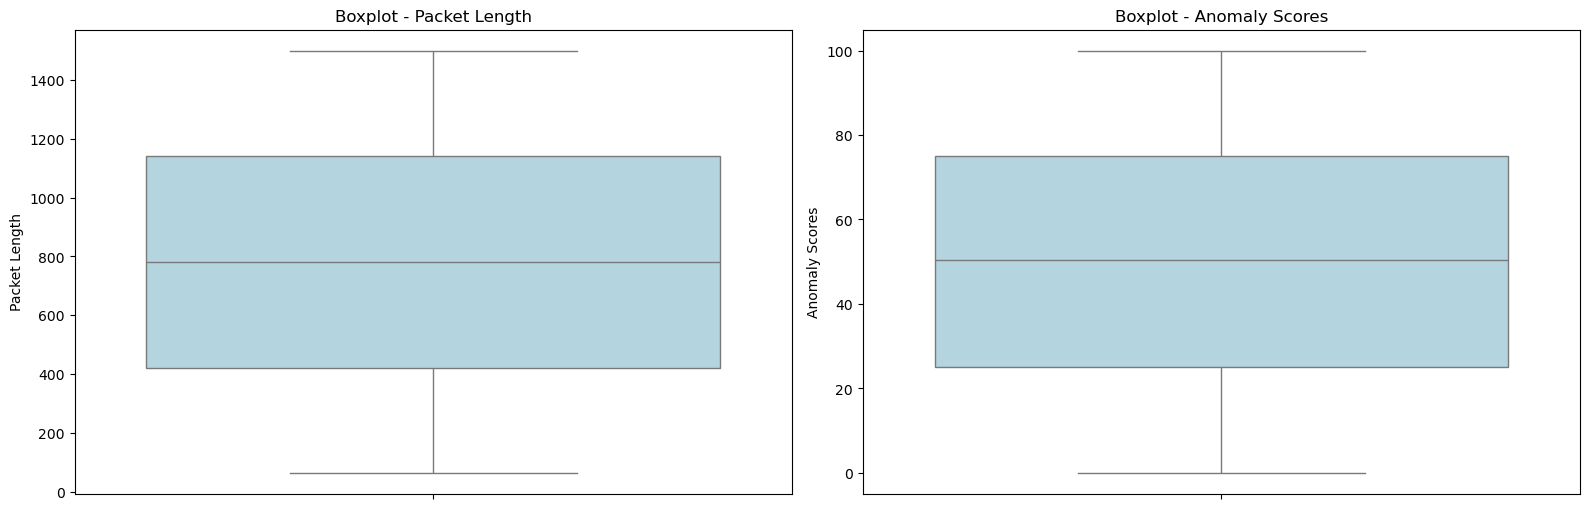

In [17]:


# Liste des variables numériques à visualiser
num_vars = [ 'Packet Length', 'Anomaly Scores']

# Configuration de l'affichage
plt.figure(figsize=(16, 10))
for i, var in enumerate(num_vars):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=cleaned_data, y=var, color='lightblue')
    plt.title(f'Boxplot - {var}')
    plt.tight_layout()
plt.show()


1. Packet Length
 - Plage des valeurs : environ 0 à 1500 octets.

 - Médiane autour de 800, indiquant une distribution légèrement asymétrique à gauche.

 - Grande variabilité dans les longueurs de paquets (large IQR).

 - Aucun outlier visible selon la définition statistique (IQR).

==> Interprétation :

- La taille des paquets varie fortement.

- Peut refléter différents types de trafic (HTTP, FTP, attaques, etc.).

- Un croisement avec la variable Attack Type serait pertinent.

2. Anomaly Scores
- Plage des scores : 0 à 100 (peut-être normalisée ou bornée).

- Médiane autour de 50, distribution plutôt symétrique.

- La dispersion est importante, mais pas d’outliers visibles.

 ==>Interprétation :

- Les scores couvrent uniformément l’intervalle sans extrêmes anormaux détectés par IQR.

## Multivariate Descriptive Analysis

###  Pertinence de l'Analyse en Composantes Principales (ACP)

Avant de mettre en œuvre une ACP sur notre dataset, il est important d’évaluer la pertinence de cette méthode dans notre contexte spécifique :

-  **Objectif de l'ACP** : L'Analyse en Composantes Principales (ACP) est utilisée pour réduire la dimensionnalité des données tout en conservant un maximum d'information.<br> Elle permet de visualiser des relations entre variables numériques et de détecter des structures cachées.

-  **Limitation du dataset** : La majorité des variables présentes dans notre jeu de données sont de type **catégoriel ou textuel** (ex. `Attack Type`, `Severity Level`, `Protocol`, etc.), ce qui limite l’intérêt d’une ACP simple.

-  **Peu de variables numériques** : Seules quelques colonnes comme `Packet Length`, `Anomaly Scores`, `Source Port` et `Destination Port` sont numériques. Cela restreint fortement la capacité de l’ACP à extraire des dimensions significatives.

-  **Informations techniques peu discriminantes** : Les variables numériques disponibles sont surtout techniques et n’offrent pas, à elles seules, de vision claire sur la nature ou la sévérité des attaques.

-  **Besoin d’un encodage préalable** : Pour intégrer les variables catégorielles à l’analyse factorielle, un encodage (ex : One-Hot Encoding) est nécessaire. Alternativement, une **Analyse des Correspondances Multiples (ACM)** serait plus adaptée pour ce type de données.


-  **Conclusion** : Une ACP simple appliquée uniquement aux variables numériques n’est **pas suffisante pour extraire des insights métier pertinents**.<br> Une approche hybride ou enrichie est préférable pour obtenir des résultats exploitables dans un contexte professionnel.


## Data Visualization